In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("fct_invoice.csv")

df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
json_df = pd.read_json("dim_customer.json")

json_df.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


# Easy

1. How many unique customers are in the dataset?

In [5]:
result=len(df["customer_id"].unique())

print('There are',result, 'unique customers in the dataset')

There are 5191 unique customers in the dataset


2. What are the different categories of products available? How many unique categories are there?

In [6]:
# diff categories available
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [7]:
# no. of unique categories
unique_no=len(df["category"].unique())

print('There are', unique_no,'unique categories in the data set')

There are 8 unique categories in the data set


3. Which payment method is the most popular? How many times was it used?

In [8]:
most_pop=df["payment_method"].value_counts()
print(most_pop)

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [9]:
print("The most popular method used is Cash and was used 44447 times")

The most popular method used is Cash and was used 44447 times


# Medium

1. What are the three most popular categories, by total sales?

In [10]:
#step 01:
df["Total"] =df["quantity"]*df["price"]

df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [11]:
#step 02:
df.groupby("category")["Total"].sum()

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: Total, dtype: float64

In [12]:
#step 03
print('It has been found that the three most popular categories in terms of total sales are books, then clothing and cosmetics')

It has been found that the three most popular categories in terms of total sales are books, then clothing and cosmetics


2. What are the total sales attributed to customers over the age of 45?

In [13]:
#step 01:
new_df = df.merge(json_df, how="left", left_on = 'customer_id', right_on = 'id')

new_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes


In [14]:
#step 02:
filtered_df= new_df[new_df['age'] >= 45]
filtered_df['Total'].sum()

84307291.82000001

The total sales attributed to customers over the age of 45 is php 84,307,291.82

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [21]:
import matplotlib.pyplot as plt

In [22]:
df['invoice_date']= pd.to_datetime(df['invoice_date'])
df['month'] = df['invoice_date'].dt.month
invoice_counts = df['month'].value_counts().sort_index()

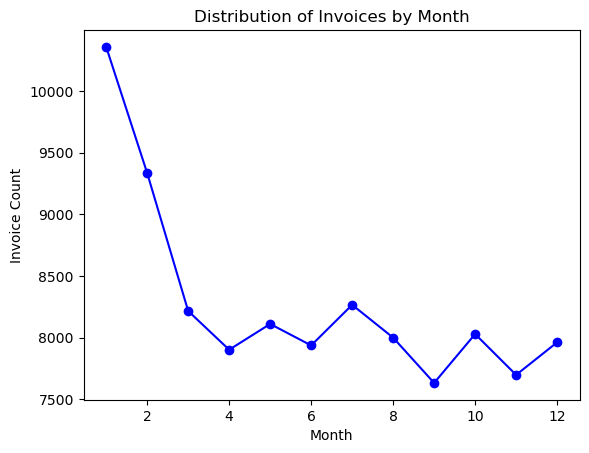

In [23]:
plt.plot(invoice_counts.index, invoice_counts.values, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Invoice Count')
plt.title('Distribution of Invoices by Month')

# Display the graph
plt.show()

In [24]:
df['invoice_date']= pd.to_datetime(df['invoice_date'])
df['year'] = df['invoice_date'].dt.year
invoice_counts = df['year'].value_counts().sort_index()

df.head(15)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total,month,year
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,5,2022
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,12,2021
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,9,2021
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,5,2021
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,10,2021
5,I227836,349,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,5,2022
6,I121056,158,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,3,2022
7,I293112,2423,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1200.32,1,2021
8,I293455,3208,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2700.72,4,2021
9,I326945,1575,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon,1200.32,8,2021


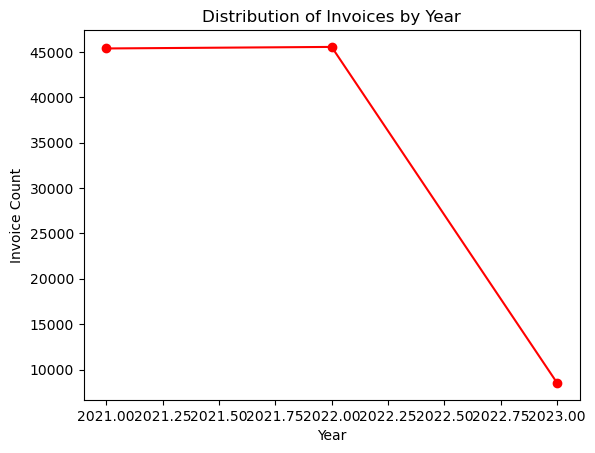

In [25]:
plt.plot(invoice_counts.index, invoice_counts.values, marker='o', linestyle='-', color='red')


plt.xlabel('Year')
plt.ylabel('Invoice Count')
plt.title('Distribution of Invoices by Year')


plt.show()


# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [26]:
new_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes


In [27]:
new_df['decade_age_range'] = new_df['age'] // 10 * 10

new_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total,age,first_name,gender,id,last_name,decade_age_range
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,NaN
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera,30.0
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens,40.0
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly,40.0
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes,NaN


In [46]:
pivot1 = pd.pivot_table(new_df, values='Total', index='category', columns='decade_age_range', aggfunc=sum)
print(pivot1)

decade_age_range        10.0         20.0         30.0         40.0  \
category                                                              
Books               12801.75     79461.75     84143.10     87203.40   
Clothing          1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics          109619.36    605915.32    723544.70    665034.96   
Food & Beverage     13582.31     73491.96     87246.86     89553.29   
Shoes              993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            12375.15     54943.32     64092.72     66391.80   
Technology        1129800.00   5261550.00   6159300.00   5954550.00   
Toys                60426.24    385100.80    420582.40    390906.88   

decade_age_range         50.0         60.0        70.0        80.0  
category                                                            
Books                74962.20     80476.80    54827.85    26664.00  
Clothing          10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics    